<center>
<img src="https://pub.mdpi-res.com/sensors/sensors-21-02141/article_deploy/html/images/sensors-21-02141-g001.png?1616391439">


## <center> Lab 8: Unsupervised learning - Solution

Dans cette tâche, nous examinerons le fonctionnement des méthodes de réduction de dimensionnalité et de clustering des données. En même temps, nous nous entraînerons à nouveau à résoudre la tâche de classification.

Nous travaillerons avec l'ensemble de données [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Téléchargez les données [ici](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). Les données proviennent des accéléromètres et des gyroscopes des téléphones mobiles Samsung Galaxy S3 (vous pouvez trouver plus d'informations sur les fonctionnalités en utilisant le lien ci-dessus), le type d'activité d'une personne avec un téléphone dans sa poche est également connu – si elle/ elle marchait, se levait, s'allongeait, s'asseyait ou montait ou descendait les escaliers.

Premièrement, nous prétendons que le type d’activité nous est inconnu et nous essaierons de regrouper les personnes uniquement sur la base des fonctionnalités disponibles. Ensuite, nous résolvons le problème de la détermination du type d'activité physique en tant que problème de classification.

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [3]:
# change this if necessary
PATH_TO_SAMSUNG_DATA = "data"

In [4]:
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_test_labels.txt")).astype(int)

In [5]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

Pour le clustering, nous n'avons pas besoin d'un vecteur cible, nous travaillerons donc avec une combinaison d'échantillons d'entraînement et de test. Fusionnez `X_train` avec `X_test` et `y_train` avec `y_test`.

In [6]:
# Your code here
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

Définissez le nombre de valeurs uniques des étiquettes de la classe cible.

In [7]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [8]:
n_classes = np.unique(y).size

[Ces étiquettes correspondent à :](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 – marcher
- 2 – monter les escaliers
- 3 – descendre les escaliers
- 4 – assis
- 5 – debout
- 6 – couché

Mettez à l'échelle l'échantillon à l'aide de `StandardScaler` avec les paramètres par défaut.

In [9]:
# Your code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Réduisez le nombre de dimensions à l'aide de l'ACP, en laissant autant de composants que nécessaire pour expliquer au moins 90 % de la variance des données d'origine (mises à l'échelle). Utilisez l'ensemble de données mis à l'échelle et corrigez `random_state` (constante RANDOM_STATE).

In [10]:
# Your code here
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

**Question 1 :** <br>

Quel est le nombre minimum de composantes principales requis pour couvrir les 90 % de la variance des données originales (mises à l'échelle) ?

In [11]:
#В Your code here
X_pca.shape

(10299, 65)

**Options de Reponses:**
- 56 
- 65[+]
- 66
- 193

**Question 2 :**<br>
Quel pourcentage de la variance est couvert par la première composante principale ? Arrondir au pourcentage le plus proche.

**Options de réponse :**
- 45
- 51[+]
- 56
- 61

In [12]:
# Your code here
round(float(pca.explained_variance_ratio_[0] * 100))

51

Visualisez les données en projection sur les deux premières composantes principales.

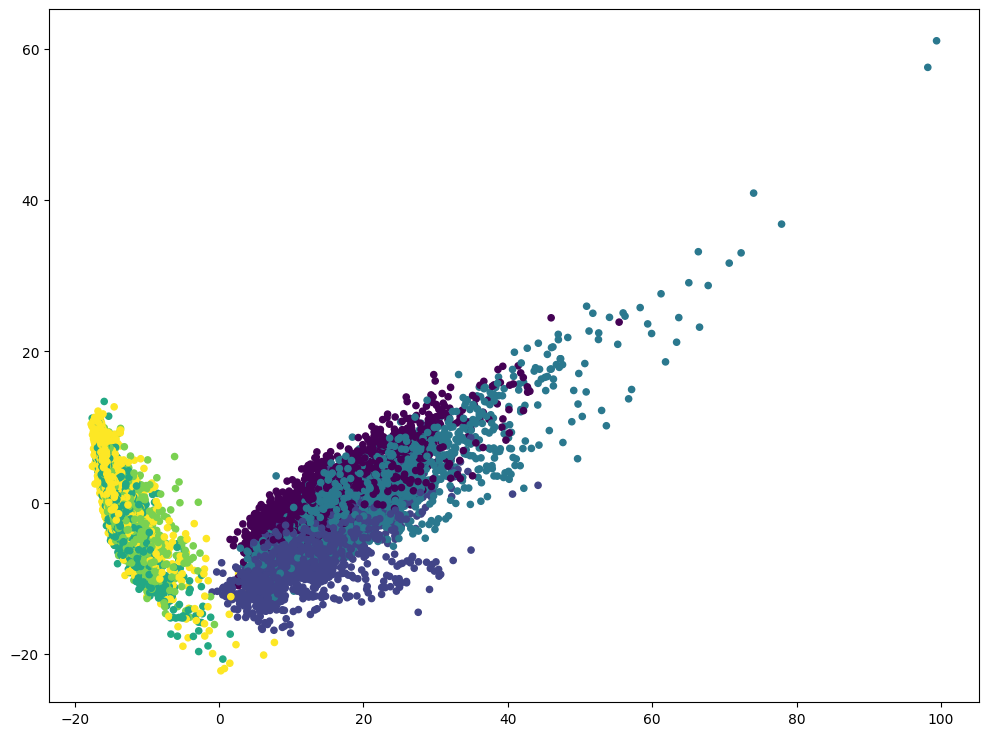

In [13]:
# Your code here
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

**Question 3 :**<br>
Si tout s’est bien passé, vous verrez un certain nombre de clusters presque parfaitement séparés les uns des autres. Quels types d’activités sont inclus dans ces clusters ? <br>

**Options de réponse :**
- 1 cluster : les 6 activités
- 2 clusters : (marcher, monter les escaliers, descendre les escaliers) et (assis, debout, allongé)[+]
- 3 clusters : (marcher), (monter les escaliers, descendre les escaliers) et (assis, debout, allongé)
- 6 clusters

------------------------------

Effectuez un clustering avec la méthode `KMeans`, en entraînant le modèle sur des données à dimensionnalité réduite (par PCA). Dans ce cas, nous donnerons un indice pour rechercher exactement 6 clusters, mais dans le cas général, nous ne saurons pas combien de clusters nous devons rechercher.

Possibilités :

- **n_clusters** = n_classes (nombre de labels uniques de la classe cible)
- **n_init** = 100
- **random_state** = RANDOM_STATE (pour la reproductibilité du résultat)

Les autres paramètres doivent avoir des valeurs par défaut.

In [15]:
# Your code here
kmeans = KMeans(n_clusters=n_classes, n_init=100, 
                random_state=RANDOM_STATE, 
                # n_jobs=1
                )
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

Visualisez les données en projection sur les deux premières composantes principales. Colorie les points selon les clusters obtenus.

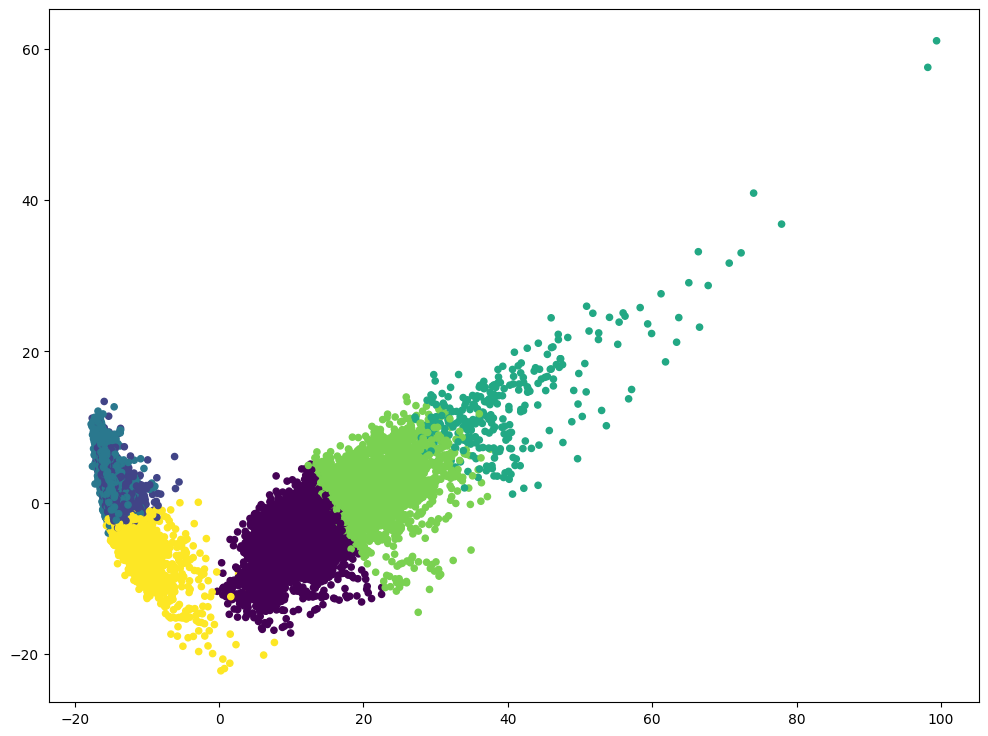

In [16]:
# Your code here
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  
            cmap='viridis');

Examinez la correspondance entre les marques de cluster et les étiquettes de classe d'origine et les types d'activités pour lesquelles l'algorithme `KMeans` est confus.

In [17]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,903,0,0,78,741,0,1722
going up the stairs,1241,0,0,5,296,2,1544
going down the stairs,320,0,0,196,890,0,1406
sitting,1,1235,91,0,0,450,1777
standing,0,1344,0,0,0,562,1906
lying,5,52,1558,0,0,329,1944
all,2470,2631,1649,279,1927,1343,10299


Nous voyons que pour chaque classe (c’est-à-dire chaque activité), il existe plusieurs clusters. Examinons le pourcentage maximum d'objets dans une classe attribués à un seul cluster. Il s'agira d'une métrique simple qui caractérise la facilité avec laquelle la classe est séparée des autres lors du clustering.

Exemple : si pour la classe "descendre les escaliers" (avec 1406 instances lui appartenant), la répartition des clusters est :
 - groupe 1 à 900
 - groupe 3 - 500
 - groupe 6 - 6,

alors une telle part sera de 900/1406 $ \approx 0,64 $.


**Question 4 :** <br>
Quelle activité est mieux séparée des autres que les autres sur la base de la simple métrique décrite ci-dessus ? <br>

**Répondre:**
- marche
- debout
- descendre les escaliers
- les trois options sont incorrectes [+]

In [18]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / 
          tab.iloc[:-1,-1].values, index=tab.index[:-1])

walking                  0.524390
going up the stairs      0.803756
going down the stairs    0.633001
sitting                  0.694992
standing                 0.705142
lying                    0.801440
dtype: float64

On voit que kMeans ne distingue pas très bien les activités. Utilisez la méthode du coude pour sélectionner le nombre optimal de clusters. Les paramètres de l'algorithme et les données que nous utilisons sont les mêmes qu'avant, nous modifions uniquement `n_clusters`.

In [20]:
# Your code here
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, 
                    random_state=RANDOM_STATE, 
                    # n_jobs=1
                    ).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

  0%|          | 0/6 [00:00<?, ?it/s]

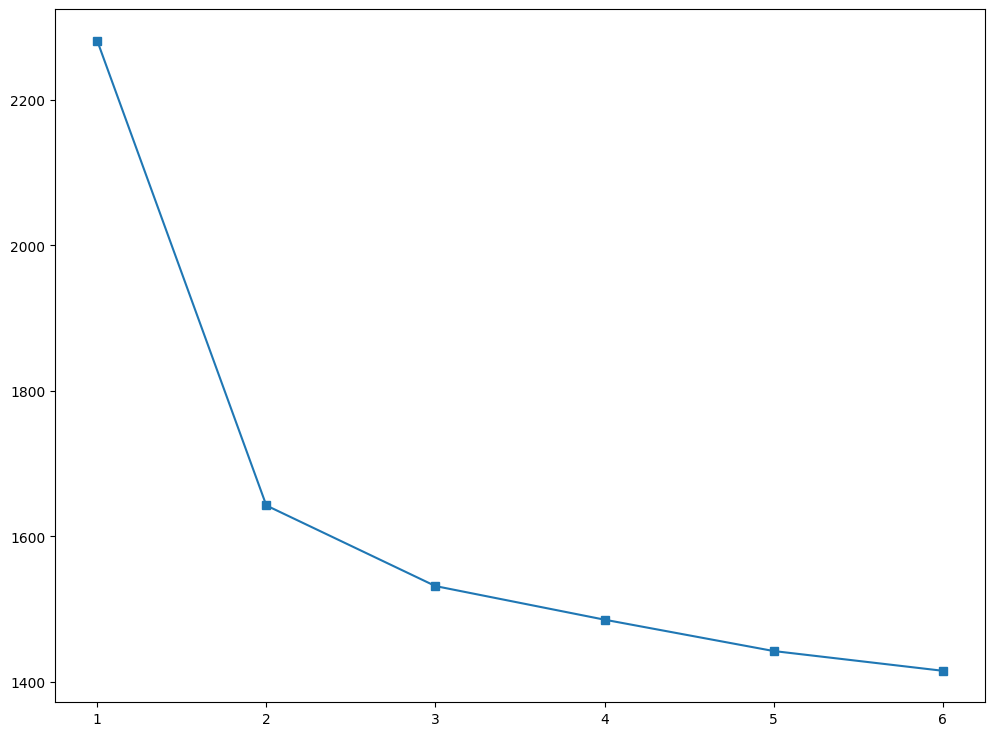

In [21]:
plt.plot(range(1, 7), inertia, marker='s');

Nous calculons $D(k)$, comme décrit dans le cours dans la section `Sélection du nombre de clusters pour kMeans`.

In [22]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [23]:
d

{2: 0.1734475356009411,
 3: 0.41688555755863893,
 4: 0.9332195900967444,
 5: 0.6297019542007396}

**Question 5 :** <br>
Combien de clusters peut-on choisir selon la méthode du coude ? <br>

**Options de réponse :**
- 1
- 2[+]
- 3
- 4

------------------------

Essayons un autre algorithme de clustering, décrit dans l'article : le clustering agglomératif.

In [24]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

Calculez l'indice Rand ajusté (`sklearn.metrics`) pour le clustering résultant et pour ` KMeans` avec les paramètres de la 4ème question.

In [25]:
# Your code here
print('KMeans: ARI =', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative CLustering: ARI =', 
      metrics.adjusted_rand_score(y, ag.labels_))

KMeans: ARI = 0.4198070012602345
Agglomerative CLustering: ARI = 0.49362763373004886


**Question 6 :** <br>
Sélectionnez toutes les affirmations correctes. <br>

**Options de réponse :**
- ARI exprime la similarité des tags obtenus après clustering, avec des labels de classe pour un même échantillon et plus la valeur de cet indice est élevée, mieux c'est **[+]**
- Selon ARI, KMeans a moins bien géré le clustering que le clustering aggloméré **[+]**
- Pour ARI, peu importe les balises attribuées au cluster, seul le partitionnement des objets en clusters est important **[+]**
- En cas de partitionnement aléatoire en clusters, l'ARI sera proche de zéro **[+]**


**Commentaire:**
1. Décrit dans la section "Adjusted Rand Index (ARI)" - les étiquettes et la classe du cluster les étiquettes sont comparées
2. Oui, plus l’ARI est élevé, mieux c’est
3. Oui, si vous renumérotez les clusters différemment, ARI ne changera pas
4. Vrai

-------------------------------

Vous pouvez remarquer que la tâche n'est pas très bien résolue lorsque l'on essaie de détecter plusieurs clusters (> 2). Résolvons maintenant le problème de classification, étant donné que les données sont étiquetées.

Pour la classification, utilisez la machine à vecteurs de support – classe `sklearn.svm.LinearSVC`. Dans ce cours, nous avons étudié cet algorithme séparément, mais il est bien connu et vous pouvez le lire, par exemple [ici](http://cs231n.github.io/linear-classify/#svmvssoftmax).

Choisissez l'hyperparamètre `C` pour` LinearSVC` à l'aide de `GridSearchCV`.

- Former le nouveau `StandardScaler` sur l'ensemble de formation (avec toutes les fonctionnalités d'origine), appliquer la mise à l'échelle à l'ensemble de test
- Dans `GridSearchCV`, précisez `cv` = 3.

In [26]:
# Your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [28]:
%%time
# Your code here
best_svc = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits
CPU times: user 47.5 s, sys: 291 ms, total: 47.8 s
Wall time: 39 s


In [29]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9382506099134881)

**Question 7**<br>
Quelle valeur de l'hyperparamètre « C » a été choisie la meilleure sur la base d'une validation croisée ? <br>

**Options de réponse :**
- 0,001
- 0,01
- 0,1[+]
- 1
- dix

In [30]:
y_predicted = best_svc.predict(X_test_scaled)

In [31]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,lying,all
walking,494,2,0,0,0,0,496
climbing up the stairs,12,459,0,0,0,0,471
going down the stairs,2,3,414,1,0,0,420
sitting,0,4,0,426,61,0,491
standing,0,0,0,15,517,0,532
lying,0,0,0,0,11,526,537
all,508,468,414,442,589,526,2947


Comme vous pouvez le constater, le problème de la classification est plutôt bien résolu.

**Question 8 :** <br>
SVM confond-il les classes au sein des groupes d'activités que nous avons identifiés précédemment (dans la question 3) ? Nous considérons qu'il est confus si l'algorithme s'est trompé au moins dans un cas. <br>

**Options de réponse :**
- oui **[+]**
- Non

**Commentaire:**
Le classificateur a bien résolu le problème, mais pas de manière idéale.

Enfin, faites la même chose qu'à la question 7, mais ajoutez PCA.

- Utilisez `X_train_scaled` et` X_test_scaled`
- Entraînez le même PCA qu'avant, sur l'ensemble d'entraînement mis à l'échelle, appliquez la mise à l'échelle à l'ensemble de test
- Choisir l'hyperparamètre `C` via validation croisée sur l'ensemble d'entraînement avec transformation PCA. Vous remarquerez à quel point cela fonctionne plus vite maintenant.

**Question 9 :** <br>
Quelle est la différence entre la meilleure qualité (précision) pour la validation croisée dans le cas de l'ensemble des 561 caractéristiques initiales et dans le second cas, lorsque la méthode des composantes principales a été appliquée ? Arrondir au pourcentage le plus proche. <br>

**Options de réponse :**
- la qualité est la même
- 2%
- 4%[+]
- dix%
- 20%

In [32]:
# Your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [33]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [34]:
%%time
best_svc_pca = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc_pca.fit(X_train_pca, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits
CPU times: user 16.8 s, sys: 156 ms, total: 16.9 s
Wall time: 7.77 s


In [35]:
best_svc_pca.best_params_, best_svc_pca.best_score_

({'C': 1}, 0.8998943094169531)

The result with PCA is worse by 4%, comparing the best proportion of correct answers on cross-validation.

In [36]:
round(100 * (best_svc_pca.best_score_ - best_svc.best_score_))

-4

**Question 10 :** <br>
Sélectionnez toutes les affirmations correctes :

**Options de réponse :**
- L'analyse en composantes principales dans ce cas a permis de réduire le temps d'entrainement du modèle, tandis que la qualité (la proportion de réponses correctes lors de la validation croisée) en a grandement souffert, de plus de 10 %
- La PCA peut être utilisée pour visualiser des données, mais il existe de meilleures méthodes pour cette tâche, par exemple tSNE. Mais la PCA a moins de complexité informatique **[+]**
- L'ACP construit des combinaisons linéaires de caractéristiques initiales mal interprétées par les humains **[+]**
- SVM fonctionne mieux que kMeans, car il réduit clairement l'algorithme au problème d'optimisation

**Commentaire:**
1. La première affirmation est vraie, l'analyse en composantes principales dans ce cas a permis de réduire considérablement le temps d'entrainement du modèle, mais la qualité n'en a pas tellement souffert - seulement de 4 %
2. Pour la visualisation de données multidimensionnelles, il est préférable d'utiliser plusieurs méthodes d'apprentissage, en particulier tSNE. Dans le même temps, les métriques évaluant la qualité de la visualisation n'ont pas encore vraiment été inventées, mais le tSNE est largement utilisé précisément parce que dans certains cas, il construit de « bonnes » images montrant la structure des données, comme dans l'exemple avec MNIST.
3. Les combinaisons linéaires de fonctionnalités qui construisent la PCA sont mal interprétées par les humains, par exemple 0,574 \* salaire + 0,234 \* num_children
4. Cette option a un sale tour : SVM et kMeans en général ne doivent pas être comparés - ils résolvent des tâches différentes.